# Text Analysis of Titles Descriptions and Tags

In [1]:
import pandas as pd
import numpy as np
import re
import datetime  
import matplotlib.pyplot as plt
import seaborn as sns

#natural language toolkit for list of stop words
import nltk 
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('data/mergedData041022clean.csv')

## Titles and Descriptions

In [3]:
#make all title and descriptions lowercase
title = data['title_listing'].str.lower()
desc = data['description'].str.lower()

In [4]:
#look at some titles
title.head(5)

0                                      matte black mug
1    sample / second sale - 11 oz handmade ceramic ...
2    8 oz / 11 oz / 14 oz handmade ceramic mug, sto...
3    3 oz handmade ceramic espresso cup, sake cup, ...
4    13 oz / 15 oz handmade ceramic mug, stoneware ...
Name: title_listing, dtype: object

In [5]:
#look at some descriptions
desc.head(5)

0    matte black mug, perfect for your morning coff...
1    --sample / second sale for handmade stoneware ...
2    handmade stoneware mugs for coffee or tea or s...
3    a handmade stoneware tumbler for espresso, sak...
4    handmade stoneware cups for coffee or tea.\n\n...
Name: description, dtype: object

### Looking at listings that contain specific products of interest

In [6]:
# function that returns percentage of listings that contain a specific word

def percentage_item(text, word):
    true = text[text.str.contains(' ' + word + ' ')==True]
    percent = len(true)/len(text)
    return percent

In [7]:
#percentage of listings that contain the word "mug" in the TITLE
percentage_item(title, "mug")

0.11842572850035536

In [8]:
#percentage of listings that contain the word "mug" in the DESCRIPTION
percentage_item(desc, "mug")

0.1896766169154229

In [9]:
# percentage of listings that contain a specific product in their title and description

# I chose these items because I was interested in them
items = ['mug', 'plate', 'bowl', 'jar', 'planter', 'berry bowl', 'butter dish', 'cup', 'tumbler', 'bacon cooker', 'spoon rest']

for i in items:
    print(i, percentage_item(title, i), percentage_item(desc, i))


mug 0.11842572850035536 0.1896766169154229
plate 0.02407604832977967 0.05001776830135039
bowl 0.07942430703624734 0.13397299218194741
jar 0.014036958066808812 0.018834399431414357
planter 0.014658848614072495 0.01750177683013504
berry bowl 0.0010660980810234541 0.0010660980810234541
butter dish 0.002398720682302772 0.0026652452025586353
cup 0.0619225302061123 0.10403340440653873
tumbler 0.008795309168443496 0.016702203269367447
bacon cooker 0.0 0.00026652452025586353
spoon rest 0.006218905472636816 0.013415067519545132


In [ ]:
specific_prods = []
specific_prods['product'] = df['cluster'].map(categories)

### Remove punctuation, special characters and stop words from the titles and descriptons

In [10]:
# function that removes "\n", links, as well as special characters and numbers fromt text
def clean_text(text):
    for i in range (0, len(text)):
        n = '\n'
        string = text[i]
        if n in string:
            string = string.replace(n, " ")
            text[i] = string
        text[i] = re.sub("[^A-za-z]+"," ", text[i])
        text[i] = re.sub(r"http\S+","",text[i])
        text[i] = re.sub(r"www\S+","",text[i])

In [11]:
# Clean descriptions and titles
clean_text(desc)
clean_text(title)

In [12]:
#split the title strings on the spaces
title = title.str.split(" ")
desc = desc.str.split(" ")

In [13]:
## define the stopwords
stop = stopwords.words('english')

In [14]:
# add pottery-related keywords, and other irrelevant words to stopwords
stop.extend(['handmade','stoneware','pottery','ceramic','clay','x', '|','cm', 'oz', 'ml', ' ', '', 'www', 'com',
'shipping','item','items','hand','made','piece','pieces','make','please','one','use','may','inches','also',
'high','etsy', 'quot', 'wheel', 'thrown', 'wheelthrown', 'glaze', 'glazed'])

In [53]:
# Define a function that removes the stopwords
""" 
Args:
txt (series): the text as a series of lists
wrds (list): the stopwords to be removed from the list


"""
def remove_stopwords(txt, wrds):
    txt = txt.reset_index(drop=True) #reset the index
    for i in range (0, len(txt)):
        for s in wrds:
            lst = txt[i]
            lst = [w for w in list if w != s]
            txt[i] = lst

In [51]:
remove_stopwords(desc, stop)
remove_stopwords(title, stop)

In [55]:
title

0                                      [matte, black, mug]
1        [sample, second, sale, mug, coffee, mug, tea, ...
2                             [mug, coffee, mug, tea, mug]
3                      [espresso, cup, sake, cup, tumbler]
4                             [mug, coffee, mug, tea, mug]
                               ...                        
11251    [plate, legs, organiser, small, fruit, keeper,...
11252    [vintage, art, object, letter, holder, paperwe...
11253    [jug, incised, design, milk, jug, traditional,...
11254                                  [lava, fleck, vase]
11255         [soap, dish, buff, white, gloss, vandranite]
Name: title_listing, Length: 11256, dtype: object

### Save the cleaned descriptions and titles to csv to use for clustering algorithm

In [20]:
#title.to_csv('data/titles-cleaned041022.csv')
#desc.to_csv('data/descriptions-cleaned041022.csv')

### Word Counts

In [21]:
#define a function that reduces a column to a 1-dimensional series (to get word counts)
def oneD(column):
 return pd.Series([x for list in column for x in list])

In [22]:
#get the value counts for each of the words in the description
descWordCounts = oneD(desc).value_counts()

In [67]:
# Get the top words in the descriptions
top25desc = descWordCounts.head(25).sort_values(ascending=False)

In [68]:
# Get the value counts for each of the words in the titles
titleWordCounts = oneD(title).value_counts()

In [69]:
# Get the top 25 words in the titles
top25title = titleWordCounts.head(25).sort_values(ascending=False)

[Text(0.5, 1.0, 'Top 25 Words in the Titles')]

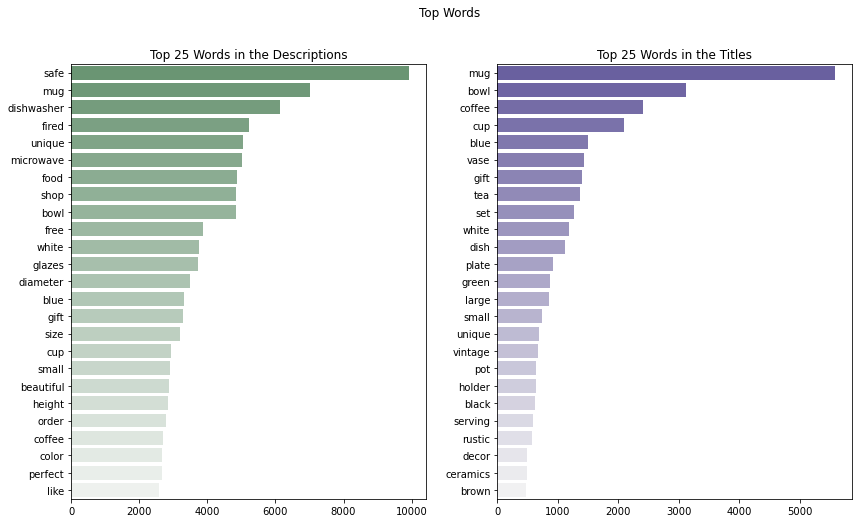

In [71]:
# plot top tags in different subsets of the data
fig, axes = plt.subplots(1,2, figsize = (14, 8))
fig.suptitle('Top Words')

# plot the top words in the descriptions
sns.barplot(ax=axes[0], x=top25desc.values, y=top25desc.index, palette='light:#639c6f_r').set(title='Top 25 Words in the Descriptions')

# plot the top wordsin the titles
sns.barplot(ax=axes[1],x=top25title.values, y=top25title.index, palette='light:#6255aa_r').set(title='Top 25 Words in the Titles')

## Tags

In [26]:
#make all tags lowercase
data['tags'] = data['tags'].str.lower()

In [27]:
#transform tags column from strings to lists
data['tags'] = data['tags'].apply(eval)

In [28]:
#get just the tags
tags = data['tags']

### Remove pottery-related stopwords from the tags

In [29]:
#define common stopwords
stopTags = ['handmade','stoneware','pottery','ceramic','clay','handmade pottery',
            'stoneware pottery','ceramics','handmade ceramics','gift','wheel thrown','one of a kind']

In [30]:
#remove stop words from tags
for i in range (0, len(tags)):
    for s in stopTags:
        tags_list = tags[i]
        if s in tags_list:
            tags_list.remove(s)

In [31]:
#add clean tags to original df
data['clean_tags'] = tags

In [32]:
# save dataframe with clean tags 
#data.to_csv('data/tags-cleaned041022.csv')

In [33]:
#get the value counts for each of the tags
tagCounts = oneD(tags).value_counts()

In [34]:
# Sort the top tags overall
top25 = tagCounts.head(25).sort_values(ascending=False)

In [35]:
# the word "spoon" is appearing in the top words in the titles so I wanted to see what the related tags are:
tagCounts[tagCounts.index.str.contains(pat = 'spoon')]

spoon rest              182
ceramic spoon rest       69
pottery spoon rest       51
handmade spoon rest      48
stoneware spoon rest     39
                       ... 
spoon rest modern         1
scoop spoon               1
elegant spoon set         1
japanese ramen spoon      1
slab spoon rest           1
Length: 271, dtype: int64

#### I repeated the above for all the top words in the titles that were products so I could see if they were normally used in a phrase like "spoon rest" rather than individually and used this later on in the "Business Information" notebook

### Get top 20 tags for top-favorited and top rated shops

In [36]:
#dataframe with tags, num of favorites
itemData = data[['listing_id','clean_tags','num_favorers_listing']]

In [37]:
#look at top 25 listings according to number of favorers
itemData.sort_values(by = ['num_favorers_listing'], ascending = False).head(25)

,listing_id,clean_tags,num_favorers_listing
3451,175789619,"[best selling mug, gift under 50, gift for dad...",26530
1849,792180615,"[ceramic mug, handpainted mug, nature mug, flo...",13605
936,900330801,"[wheel thrown pottery, fine art ceramics, dini...",13324
2219,1086863643,"[caffeine addict, coffee lover, gift for mom, ...",10564
10185,535025569,"[coffee cup, parceline, tea cup, coffee mug, c...",9678
2,741218574,"[handmade ceramic mug, handmade mug, ceramic m...",8344
40,677424431,"[handmade coffee mug, birthday gift mug, coffe...",7948
445,128982522,"[etsymudteam, claylicious, stoneware berry bow...",7939
4075,1112309379,"[handmade mug, stoneware mug, home decor, cera...",7910
5427,151354984,"[cup, teacup, roses, dots, pink, light blue, m...",7476


In [38]:
#this is the 3,873 listings with at least 10 favorers
TenOrMore = itemData[itemData['num_favorers_listing']>=10]
#TenOrMore.shape

In [39]:
#get the value counts for each of the tags in TenOrMore
tagCountsFavs = oneD(TenOrMore["clean_tags"]).value_counts()

In [40]:
# Sort the top 25 tags from the listings with ten or more favorers
top25Favs = tagCountsFavs.head(25).sort_values(ascending=False)

### Get top 25 tags for top-rated shops (greater than 4.9) with at least 10 reviews

In [41]:
# dataframe with tags, shop review count, and review average
shopData = data[['listing_id','clean_tags','num_favorers_listing','review_average', 'review_count']]

In [42]:
# get the shops that have at least 10 reviews
shops10reviews = shopData[shopData['review_count']>=10]

In [43]:
#this is the 9036 listings from shops with at least 10 reviews
TenReviews =  shopData[shopData['review_count']>=10]

In [44]:
# this is the 8106 listings from shops with at least 10 reviews AND a 4.8 star rating or higher
topShops =  TenReviews[TenReviews['review_average']>=4.9]

In [45]:
#get the value counts for each of the tags in the topShops listings
tagCountsTopShops = oneD(topShops["clean_tags"]).value_counts()

# Sort the top 25 tags from the listings with ten or more favorers
top25TopShops = tagCountsTopShops.head(25).sort_values(ascending=False)

Text(0.5, 1.0, 'Top 25 Tags for Listings from Shops w/4.9 or Higher Rating and At Least 10 Reviews')

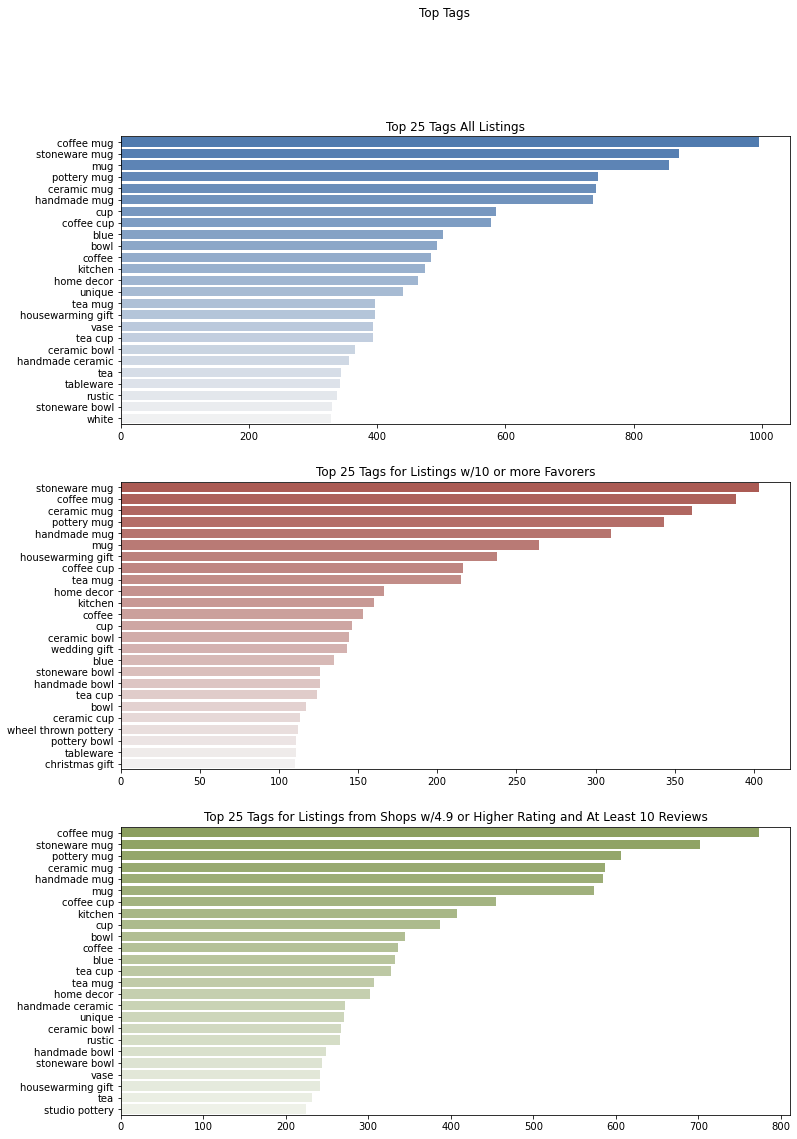

In [46]:
# plot top tags in different subsets of the data
fig, axes = plt.subplots(3, 1, figsize = (12, 18))
fig.suptitle('Top Tags')

# plot all the top tags overall
sns.barplot(ax=axes[0], x=top25.values, y=top25.index, palette='light:#4079bf_r')
axes[0].set_title('Top 25 Tags All Listings')

# plot the top tags for listings with 10 or more favorers
sns.barplot(ax=axes[1], x=top25Favs.values, y=top25Favs.index, palette='light:#b94f46_r')
axes[1].set_title('Top 25 Tags for Listings w/10 or more Favorers')

# plot the top tags for listings from shops with at least 10 reviews and a 4.9 star rating or higher
sns.barplot(ax=axes[2], x=top25TopShops.values, y=top25TopShops.index, palette='light:#90aa55_r')
axes[2].set_title('Top 25 Tags for Listings from Shops w/4.9 or Higher Rating and At Least 10 Reviews')